In [1]:
from utils import validate_repeated_blocks, group_by_repeated_blocks, merge_named_columns, csv_to_tensor
import pandas as pd
import os

/sise/bshapira-group/hitter-hazizb/yuval/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# if need filter is false all result files in the folder will be used
need_filter = False
# set the folder path containing result files
folder_path = "result/base_expressions/"

# set the paths of files to be filtered **only used when need_filter is True**
filter_paths = {}

# parameters for grouping and aggregation (num of generations)
k = 5
# minimum length of the dataframe to be considered
len_filter = 200
# aggregation functions for specific columns
agg_funcs = {"Num of thought Tokens": "mean"}


filter_columns = list(agg_funcs.keys())
EXPRESSION_COLUMN = "Expression"

In [ ]:



file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    # Apply filtering based on filter_paths
    if need_filter and (file_path not in filter_paths):
        continue
    df = pd.read_csv(file_path)
    if len(df) < len_filter:
        continue
    dfs.append((file_name, df))
    print(f"{file_name}:", len(df))

arithmetic_expressions_(8 * 2).csv: 200
arithmetic_expressions_(4 + 6).csv: 200
arithmetic_expressions_(2 + 3).csv: 200
arithmetic_expressions_(2 + 2).csv: 200
arithmetic_expressions_(8 _div_ 4).csv: 200
arithmetic_expressions_(6 + 2).csv: 200
arithmetic_expressions_(9 - 3).csv: 200
arithmetic_expressions_(6 _div_ 3).csv: 200
arithmetic_expressions_(5 + 4).csv: 200
arithmetic_expressions_(3 * 7).csv: 200
arithmetic_expressions_(1 + 2).csv: 200
arithmetic_expressions_(10 - 4).csv: 200
arithmetic_expressions_(8 _div_ 2).csv: 200
arithmetic_expressions_(7 + 3).csv: 200
arithmetic_expressions_(7 - 2).csv: 200
arithmetic_expressions_(3 + 5).csv: 200
arithmetic_expressions_(5 * 3).csv: 200
arithmetic_expressions_(4 * 6).csv: 200
arithmetic_expressions_(9 * 1).csv: 200


In [5]:
#validate pd
k = 5
for name, df in dfs:
    validate_repeated_blocks(df, column="Expression", k=k)

In [6]:
remain_cols = filter_columns + [EXPRESSION_COLUMN]
eval_df = [(name, group_by_repeated_blocks(df[remain_cols], k, EXPRESSION_COLUMN, agg_funcs)) for name, df in dfs]

In [7]:
import numpy as np

import matplotlib.pyplot as plt

def plot_column_values(df, column_name, show_trend=True, trend_degree=1):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    x_pos = np.arange(len(df))
    y = df[column_name].astype(float).values

    plt.figure(figsize=(8, 5))
    plt.bar(x_pos, y, alpha=0.7)

    if show_trend and len(df) > trend_degree:
        coeffs = np.polyfit(x_pos, y, trend_degree)
        trend = np.polyval(coeffs, x_pos)
        plt.plot(x_pos, trend, color='red', linewidth=2, label=f"Trend (deg {trend_degree})")

        # R^2
        ss_res = np.sum((y - trend) ** 2)
        ss_tot = np.sum((y - y.mean()) ** 2)
        r2 = 1 - ss_res / ss_tot if ss_tot != 0 else float("nan")
        plt.annotate(f"R² = {r2:.3f}", xy=(0.98, 0.98), xycoords="axes fraction",
                     ha="right", va="top", fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.8"))

    plt.title(f"{column_name} values by index")
    plt.xlabel("Index")
    plt.ylabel(column_name)
    plt.xticks(x_pos, df.index.astype(str), rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


Plotting for arithmetic_expressions_(8 * 2).csv


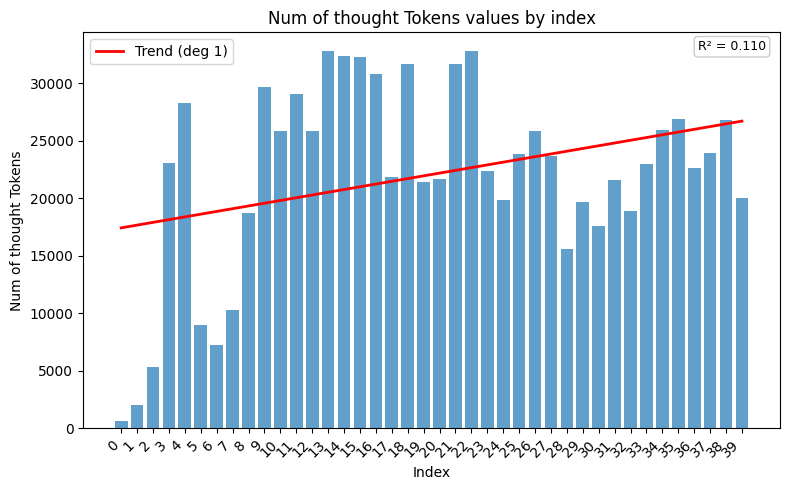

Plotting for arithmetic_expressions_(4 + 6).csv


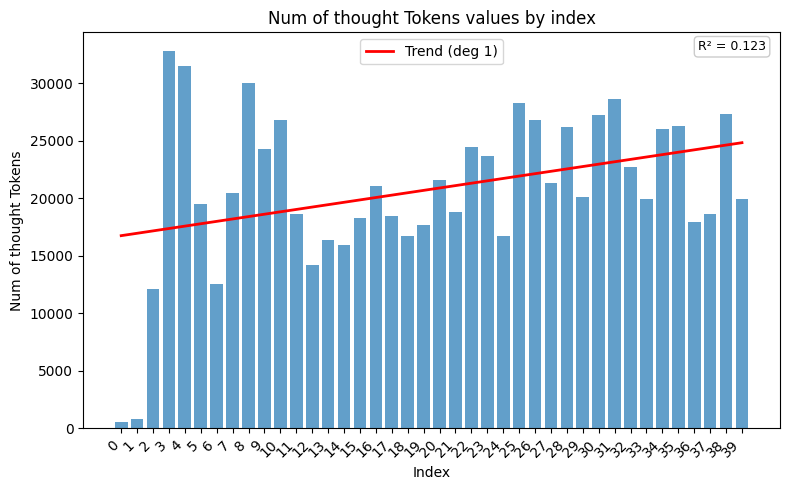

Plotting for arithmetic_expressions_(2 + 3).csv


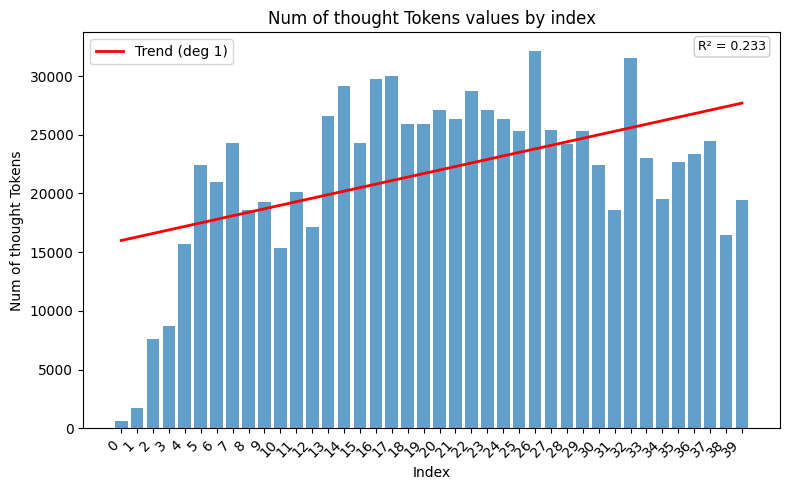

Plotting for arithmetic_expressions_(2 + 2).csv


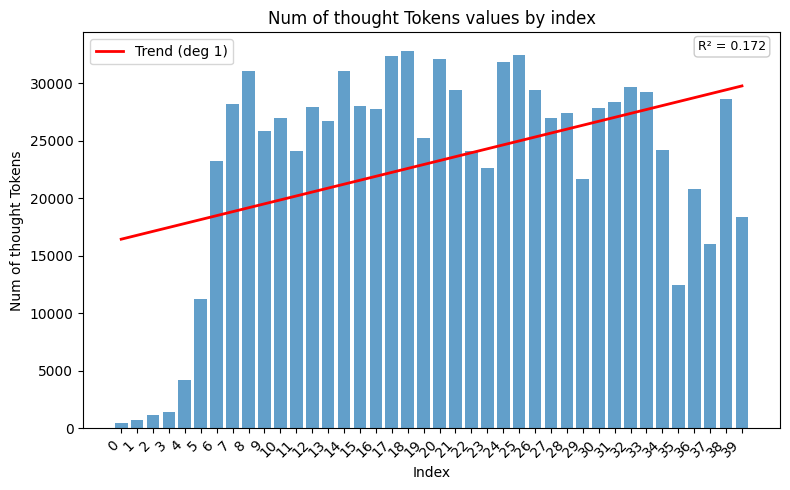

Plotting for arithmetic_expressions_(8 _div_ 4).csv


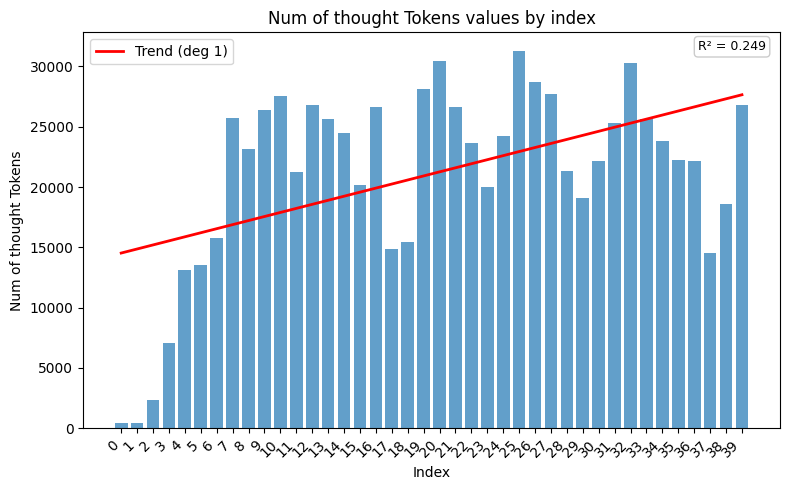

Plotting for arithmetic_expressions_(6 + 2).csv


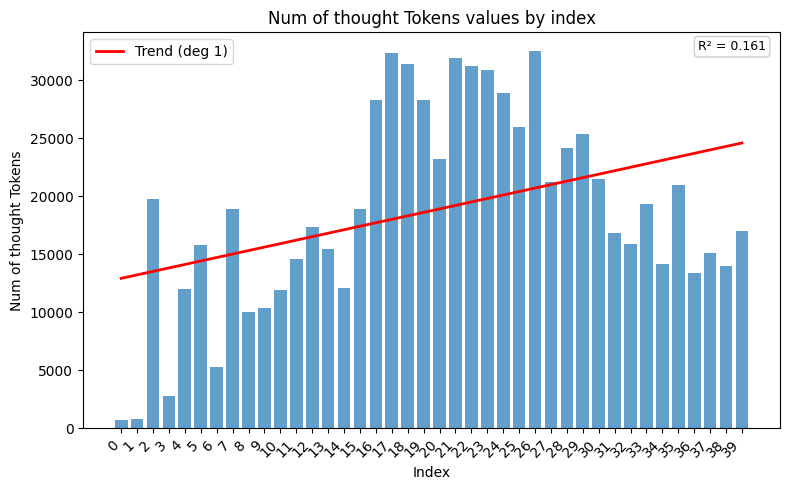

Plotting for arithmetic_expressions_(9 - 3).csv


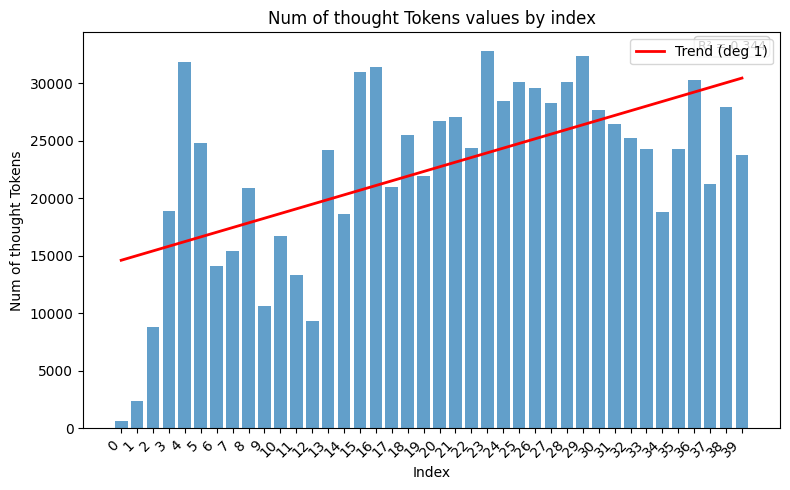

Plotting for arithmetic_expressions_(6 _div_ 3).csv


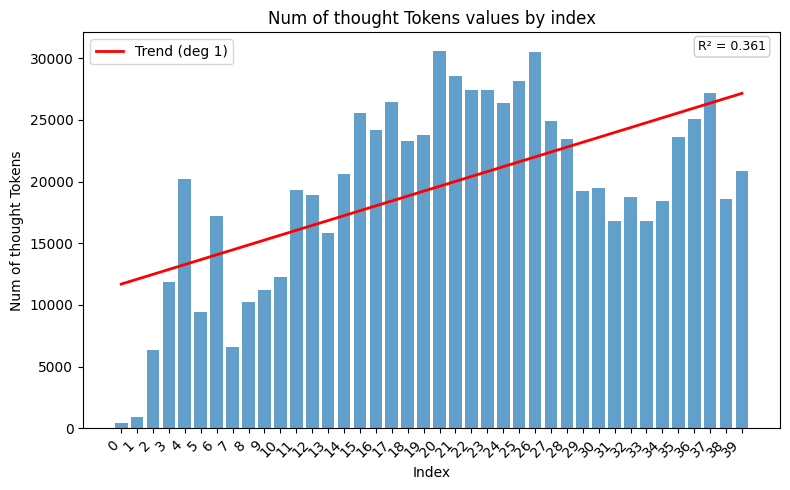

Plotting for arithmetic_expressions_(5 + 4).csv


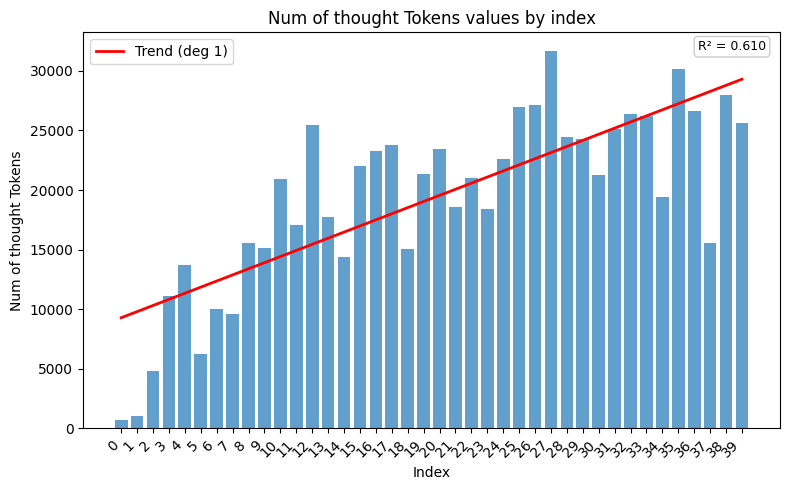

Plotting for arithmetic_expressions_(3 * 7).csv


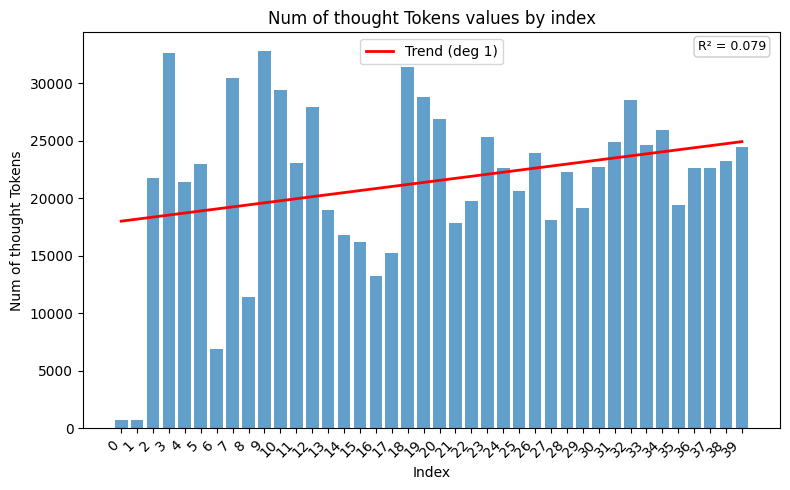

Plotting for arithmetic_expressions_(1 + 2).csv


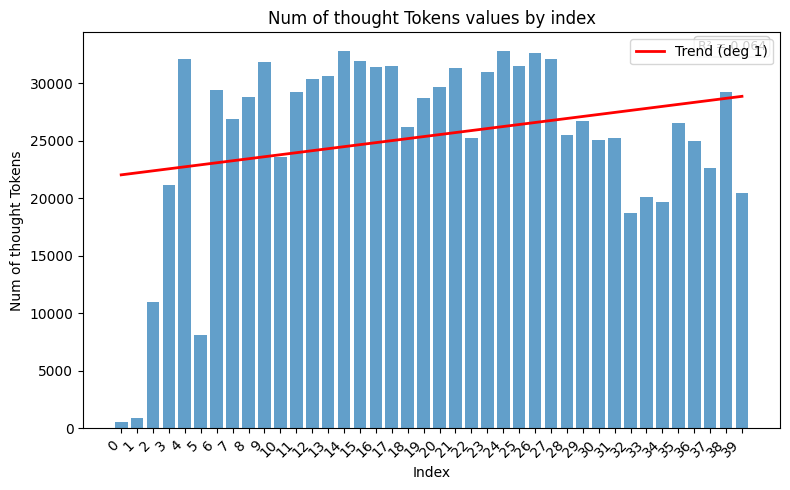

Plotting for arithmetic_expressions_(10 - 4).csv


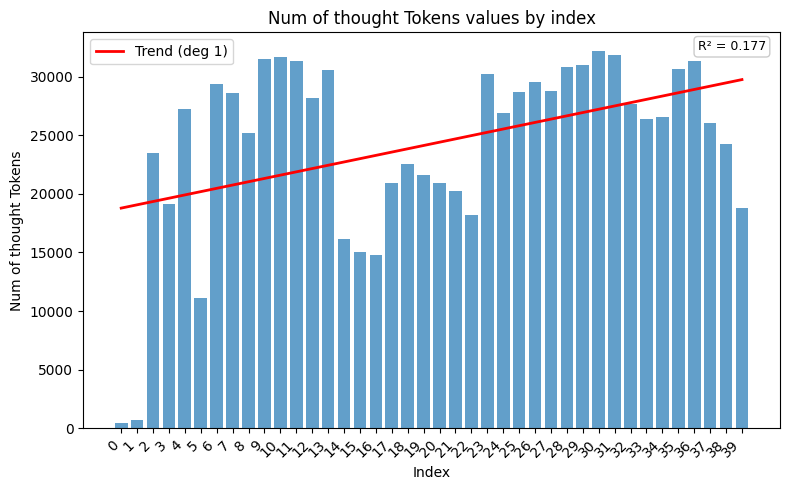

Plotting for arithmetic_expressions_(8 _div_ 2).csv


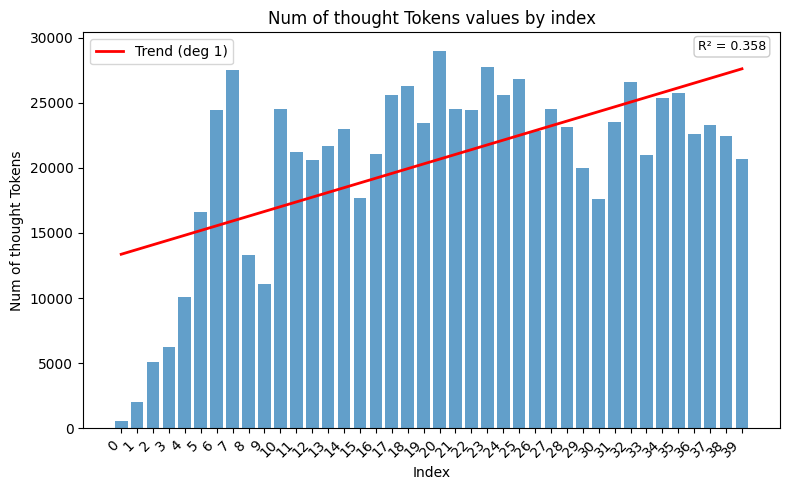

Plotting for arithmetic_expressions_(7 + 3).csv


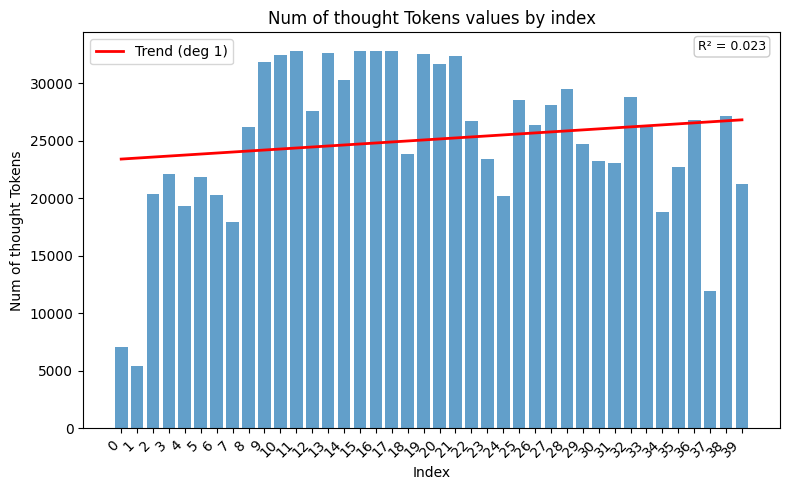

Plotting for arithmetic_expressions_(7 - 2).csv


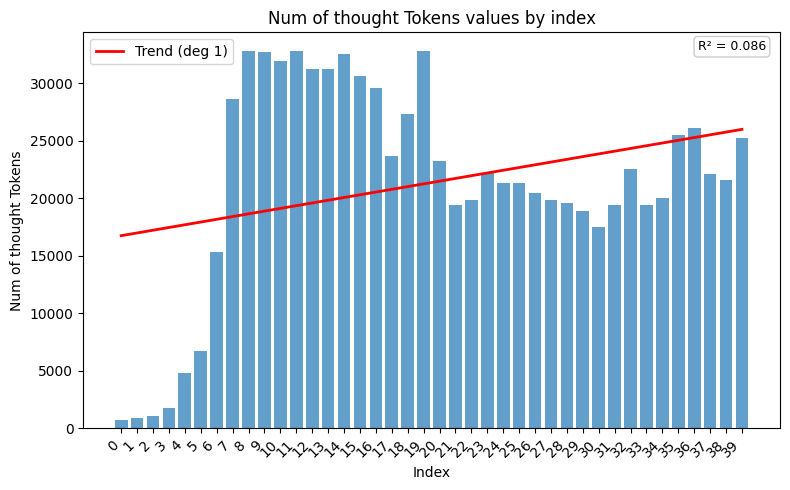

Plotting for arithmetic_expressions_(3 + 5).csv


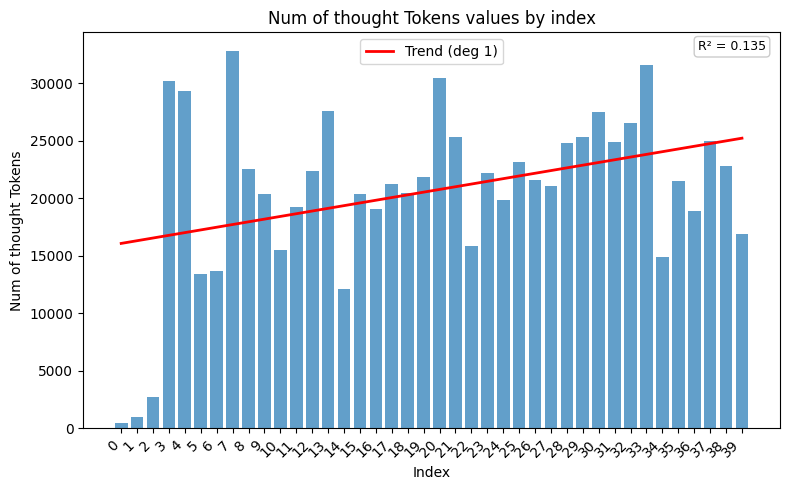

Plotting for arithmetic_expressions_(5 * 3).csv


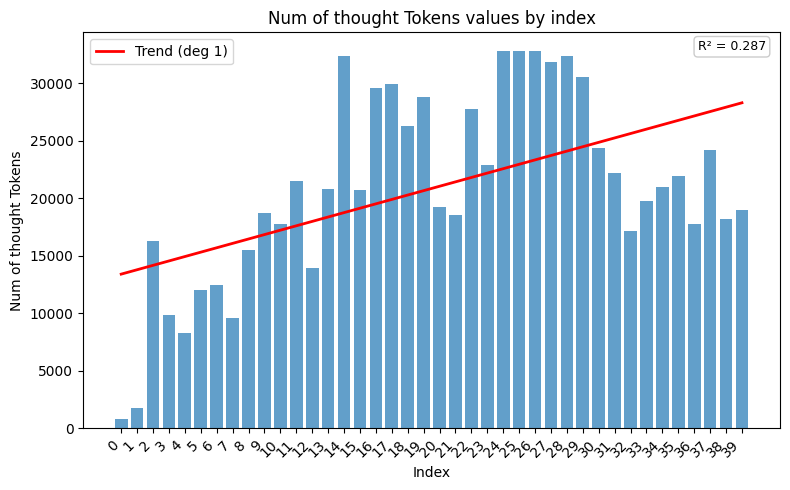

Plotting for arithmetic_expressions_(4 * 6).csv


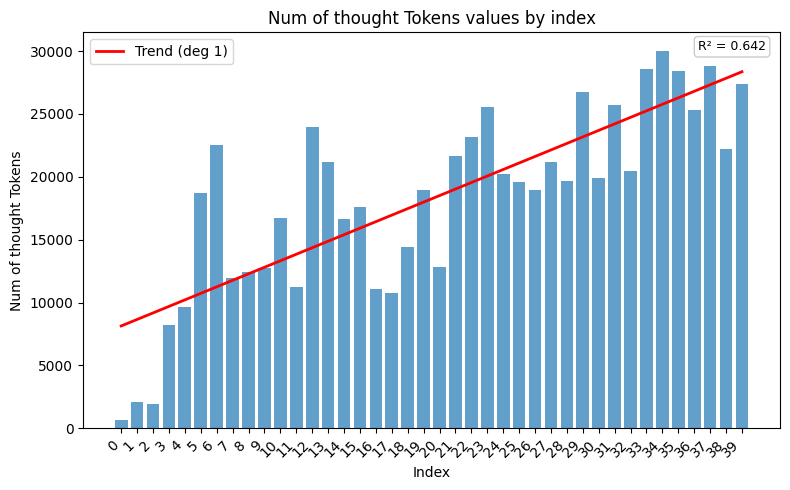

Plotting for arithmetic_expressions_(9 * 1).csv


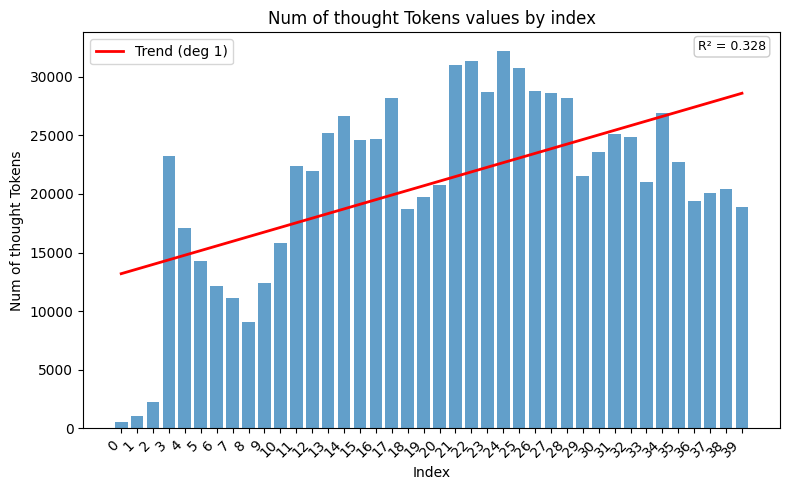

In [8]:
for column_name in filter_columns:
    for name, df in eval_df:
        print(f"Plotting for {name}")
        plot_column_values(df, column_name)

In [9]:
general_df = merge_named_columns(eval_df, filter_columns)
general_df.head(5)

,arithmetic_expressions_(8 * 2).csv_Num of thought Tokens,arithmetic_expressions_(4 + 6).csv_Num of thought Tokens,arithmetic_expressions_(2 + 3).csv_Num of thought Tokens,arithmetic_expressions_(2 + 2).csv_Num of thought Tokens,arithmetic_expressions_(8 _div_ 4).csv_Num of thought Tokens,arithmetic_expressions_(6 + 2).csv_Num of thought Tokens,arithmetic_expressions_(9 - 3).csv_Num of thought Tokens,arithmetic_expressions_(6 _div_ 3).csv_Num of thought Tokens,arithmetic_expressions_(5 + 4).csv_Num of thought Tokens,arithmetic_expressions_(3 * 7).csv_Num of thought Tokens,arithmetic_expressions_(1 + 2).csv_Num of thought Tokens,arithmetic_expressions_(10 - 4).csv_Num of thought Tokens,arithmetic_expressions_(8 _div_ 2).csv_Num of thought Tokens,arithmetic_expressions_(7 + 3).csv_Num of thought Tokens,arithmetic_expressions_(7 - 2).csv_Num of thought Tokens,arithmetic_expressions_(3 + 5).csv_Num of thought Tokens,arithmetic_expressions_(5 * 3).csv_Num of thought Tokens,arithmetic_expressions_(4 * 6).csv_Num of thought Tokens,arithmetic_expressions_(9 * 1).csv_Num of thought Tokens
0,644.6,522.2,596.2,451.8,413.2,671.4,602.8,418.8,716.8,681.0,587.4,468.6,548.6,7093.0,690.6,443.8,773.4,690.0,496.4
1,2027.0,818.4,1700.8,684.4,448.2,803.6,2371.2,901.2,1002.2,696.0,853.2,726.4,1994.4,5404.4,875.4,996.0,1797.8,2060.4,1029.4
2,5292.8,12144.2,7583.2,1165.8,2312.6,19803.6,8820.8,6314.6,4821.2,21723.0,10992.8,23487.4,5099.0,20344.8,1063.4,2688.2,16265.6,1929.0,2215.8
3,23075.2,32768.0,8733.4,1387.4,7056.4,2776.2,18854.4,11868.2,11105.8,32646.8,21104.8,19170.2,6257.8,22098.2,1760.8,30209.6,9875.0,8229.8,23209.4
4,28294.0,31515.2,15730.0,4223.8,13143.8,12000.2,31836.4,20214.2,13685.2,21422.2,32066.0,27215.6,10072.0,19276.2,4827.8,29312.2,8263.8,9643.8,17077.0


In [10]:
tensor_data = csv_to_tensor(general_df)
tensor_data.shape

torch.Size([40, 19])

In [ ]:
row_mean = tensor_data.mean(dim=1)           # [5.5, 6.5, 7.5]
diffs = row_mean[1:] - row_mean[:-1]  # [6.5-5.5, 7.5-6.5]
print(len(diffs))
diffs

39


tensor([ 5.0946e+02,  7.7304e+03,  6.2168e+03,  3.0333e+03, -3.7981e+03,
         1.8440e+03,  3.7937e+03, -4.9592e+02,  1.7466e+03,  7.9919e+02,
        -7.8885e+01,  4.6212e+02,  1.6211e+03, -1.2644e+03,  5.2602e+02,
         1.1866e+03, -5.0093e+02, -2.9781e+02,  8.2936e+02,  5.4589e+02,
        -7.4707e+00, -5.8266e+02,  7.5854e+02, -2.6147e+02,  1.9233e+03,
         2.1537e+02, -1.8327e+03, -6.6863e+02, -1.1076e+03, -5.8475e+02,
         6.8479e+02,  4.0028e+02, -7.9647e+02, -1.4029e+03,  1.8589e+03,
        -8.7300e+02, -1.8219e+03,  1.8084e+03, -1.7476e+03])

: 